In [ ]:
# import your packages!
import matplotlib.pyplot as plt

# Q1 Python Basics

## a) Creating lists

Create a list of length 4 with the following data types in order: string, boolean, integer, float.

## b) Creating dictionaries

Create a dictionary called `friends_ages` mapping the names of 5 friends to their ages. The friends' names should be strings; the values for their ages should be integers. You can make up names for friends and values for ages if you wish.

## c) Creating a dictionary of lists

Create a dictionary, `d1` with keys 0, 1, 2 where each key maps to a list of length 4 whose entries have the following types: `str`, `bool`, `int`, `float`. The exact values in the lists are up to you but they must have the correct type.

In [ ]:
d1 = ???

The code in the cell below will help you check your work. It should produce a `DataFrame` from your dictionary of row data where each column has a different type.

In [ ]:
df1 = pd.DataFrame.from_dict(
    d1,
    orient="index",
    columns=["col_0", "col_1", "col_2", "col_3"]
)
df1

In [ ]:
df1.dtypes

# Q2. Load a CSV file using Pandas

Load the following CSV file using Pandas: `./sample_data/california_housing_train.csv`

In [ ]:
%%bash
ls ./sample_data

In [ ]:
???

How many rows are in this dataset? How many columns are in this dataset? 

In [ ]:
???

Compute descriptive statistics for every column in the dataset.

In [ ]:
???

# Q3. Simulate a random walk using Python

Suppose that you initially have 1 million SAR. Every year your wealth either randomly increases by 10% or decreases by 10% (an increase or decrease is equally likely). Write a for loop to simulate your wealth for 100 years and **plot** the result.

**Hint** This is *very* similar to the example we discussed in class.

In [ ]:
???

# Q4. Linear Regression using NumPy

In this question, I will walk you through the process of coding up an algorithm to train a linear regression model using NumPy. This is a challenging exercise which will test your skills and prepare you for some of the ideas that you will encounter next week.

In this exercise you will simulate data from a model with known parameters, and then code an algorithm to recover the values of the parameters from the data. You should find that the values that your algorithm learns are close to the true values. 

## a) Creating random features

Create an array of ones with $m$ rows and 1 column representing a constant feature (sometimes called a *bias*).

In [ ]:
bias = ???

Create an array of random normal data with `loc=1`, `shape=1` with $m$ rows and 1 column. This random array represents a *feature* of your model. 


In [ ]:
x1 = ???

The following code uses a NumPy function to combine your arrays into a single array of features.

In [ ]:
features = np.hstack([bias, x1])

## b) Simulating sampling noise

Create an array of random normal data with `loc=0`, `shape=0.5` with $m$ rows and 1 column to represent sampling noise (or measurement error). 

In [ ]:
error = ???

## c) Define an array of true parameters

First, create an array with 2 rows and 1 column with values 3.0 and 1.5. These specific values represent the *true* parameters of our model (whose values you will seek to learn from the data).

In [ ]:
true_parameters = ???

## d) Simulating a linear model

Create your target array by first using matrix multiplication to combine your `features` array and your `true_parameters` array and then adding the `error` array.

**Hint** You can perform matrix multiplication between two NumPy arrays `a1` and `a2` using the `@` operator. So, for example, 

`a1 @ a2`

would use matrix multiplication to combine the arrays `a1` and `a2`. 

In [ ]:
target = ???

## e) Plotting the simulated data

The code in the cell below will plot your simulated data. If you have done everything correctly, then your plot should look *similar* to the plot below.

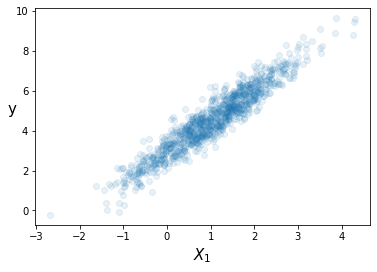

In [ ]:
_ = plt.plot(features[:, 1], target, 'o', alpha=0.1)
_ = plt.xlabel(r"$X_1$", fontsize=15)
_ = plt.ylabel("y", fontsize=15, rotation=0)

## f) Defining some useful functions

Now that you have simulated data, you will need to define several functions that you will use to code up your algorithm to *learn* the true values of the parameters from the data.

In [ ]:
def shuffle_data(X, y):
    """
    Shuffle the data, X, by generating random integers between 0 and m and then 
    using these integers to select rows from arrays X and y.

    Return both the shuffled X and the shuffled y arrays.

    """
    ???


def model_fn(X, parameters):
    """
    Your model function should use matrix multiplication to combine the arrays  
    X and parameters and return the result.

    """
    ???


def grad_fn(X, y, y_hat):
    """
    Your algorithm will compute the gradient of the loss function and use the 
    result to update your parameters. Computing gradients is tedious so I have 
    given you this function.

    The inputs to this function are the data, X, the target, y, and the 
    predictions of your model_fn, y_hat.

    """
    m, _ = y.shape
    return -(1 / m) * (X.T @ (y - y_hat))


def update_parameters(parameters, gradient, learning_rate):
    """
    Update the parameters of your model by

        1. multiplying the gradient and the learning rate.
        2. subtracting result from the current value of the parameters.
    
    Return the new values for you parameters.

    """
    ???



## g) Randomly guess some values for parameters

Initialize a 2 row and 1 column array of parameters using random normal values with `loc=0`, `scale=1`.


In [ ]:
learned_parameters = ???

## h) Code your learning algorithm

In the cell below you will write a `for` loop that will iterate for `n_epochs` that will update your parameters in an attempt to learn their true values from the data. The body of the `for` loop has a number of steps which must be completed in order.

1. shuffle the data using `shuffle_data`
2. make predictions using `model_fn`
3. compute the gradient using `grad_fn`
4. update the learned parameters using `update_parameters`

In [ ]:
# do not change these values!
learning_rate = 0.01
n_epochs = 1000

# write a for loop that loops for n_epochs and does the following...
for _ in range(n_epochs):

    # 1. shuffle the data using shuffle_data
    ??? 

    # 2. make predictions using model_fn
    ???

    # 3. compute the gradient using grad_fn
    ???

    # 4. update the parameters using update_parameters
    ???

In [ ]:
print(f"Learned Parameters: {learned_parameters[:, 0]}")

In [ ]:
print(f"True Parameters: {true_parameters[:, 0]}")

## i) Plotting your models predictions

The code in the cell below will plot your original simulated data as well as plot the predictions of your model using the learned parameters. If your algorithm has learned parameters close to the values of the true parameters, then your plot should look similar to the following.

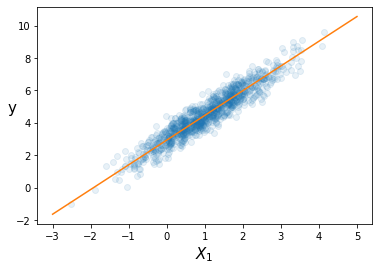

In [ ]:
new_x1 = np.linspace(-3, 5, m).reshape((-1, 1))
new_features = np.hstack([bias, new_x1])
new_target = model_fn(new_features, learned_parameters)

_ = plt.plot(features[:, 1], target, 'o',  alpha=0.1)
_ = plt.plot(new_features[:, 1], new_target)
_ = plt.xlabel(r"$X_1$", fontsize=15)
_ = plt.ylabel("y", fontsize=15, rotation=0)